In [2]:
#Name:Nalawade Prafulla Chandrashekhar.
#Roll No.:42   B.E.A.I & D.S.
# CL IV (Business Intelligence)
#Practical No.5

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load the Iris dataset 
iris = sns.load_dataset("iris") 
print(iris.head())  # Display first 5 rows

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
# Drop the categorical 'species' column 
X = iris.drop(columns=['species']) 
 
# Standardizing the features (scaling) 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

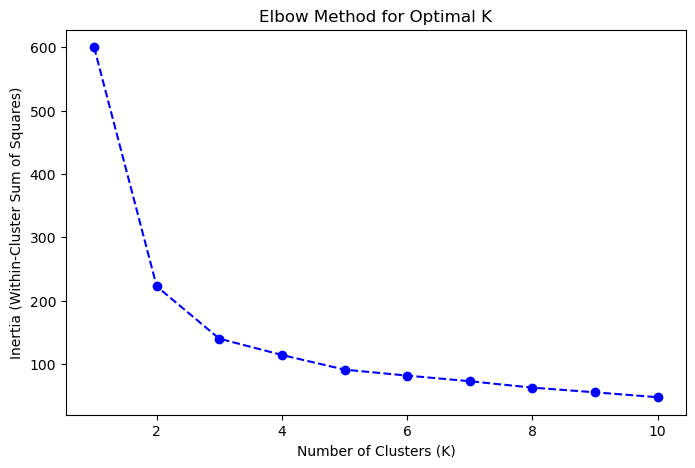

In [6]:
# Elbow Method to determine the best number of clusters 
inertia = [] 
K_range = range(1, 11)  # Check for K=1 to K=10 
 
for k in K_range: 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(X_scaled) 
    inertia.append(kmeans.inertia_) 
 
# Plot Elbow Curve 
plt.figure(figsize=(8, 5)) 
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b') 
plt.xlabel('Number of Clusters (K)') 
plt.ylabel('Inertia (Within-Cluster Sum of Squares)') 
plt.title('Elbow Method for Optimal K') 
plt.show() 

In [7]:
# Apply K-Means with 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) 
clusters = kmeans.fit_predict(X_scaled) 
 
# Assign clusters to a new column in the dataset 
iris['Cluster'] = clusters 
 
# Debug check 
print(iris.head())  # Verify the 'Cluster' column is added

   sepal_length  sepal_width  petal_length  petal_width species  Cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1
2           4.7          3.2           1.3          0.2  setosa        1
3           4.6          3.1           1.5          0.2  setosa        1
4           5.0          3.6           1.4          0.2  setosa        1


In [8]:
silhouette_avg = silhouette_score(X_scaled, clusters) 
print(f'Silhouette Score: {silhouette_avg:.2f}') 

Silhouette Score: 0.46


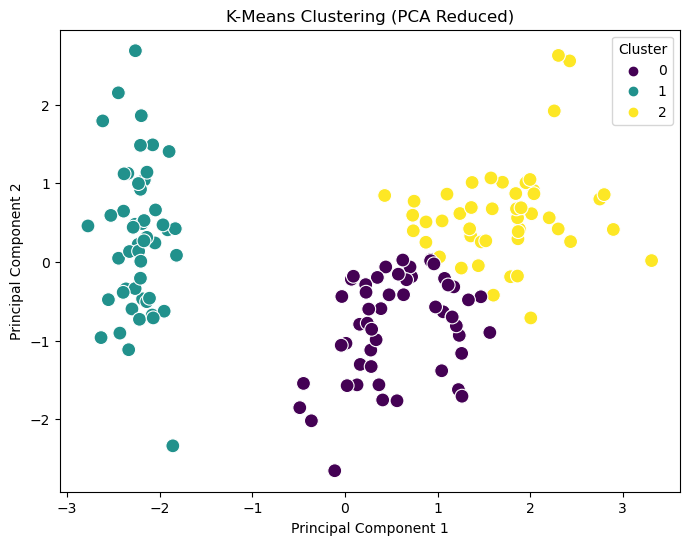

In [9]:
# Apply PCA to reduce dimensions from 4D to 2D 
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled) 
 
# Convert to DataFrame for visualization 
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2']) 
pca_df['Cluster'] = clusters  # Assign clusters
# Scatter plot of PCA components with clusters 
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], 
palette='viridis', s=100) 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.title('K-Means Clustering (PCA Reduced)') 
plt.legend(title='Cluster') 
plt.show() 